In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df=pd.read_csv(r"E:\Documents\MSS\Machine Learning\ML-Datasets\adult 3.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [16]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [17]:
print(df.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [20]:
print(df['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [24]:
print(df.workclass.value_counts())
print(df.gender.value_counts())
print(df.age.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
gender
Male      32650
Female    16192
Name: count, dtype: int64
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [28]:
df.occupation.replace({'?':'Others'},inplace=True)

In [31]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [33]:
df.workclass.replace({'?':'NotListed'},inplace=True)

In [34]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [40]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-Worked']

In [41]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Never-worked           10
Name: count, dtype: int64

In [42]:
df=df[df['education']!='5th-6th']
df=df[df['education']!='Preschool']
df=df[df['education']!='1st-4th']

In [43]:
df.education.value_counts()

education
HS-grad         15770
Some-college    10875
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1599
10th             1389
7th-8th           953
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

In [ ]:
#redundancy
df.drop(columns=['education'],inplace=True)

In [50]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


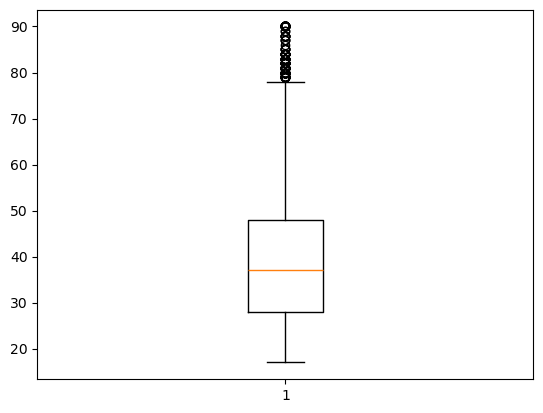

In [6]:
#outlier
plt.boxplot(df['age'])
plt.show()

In [7]:
df=df[(df['age']<=75)&(df['age']>=17)]

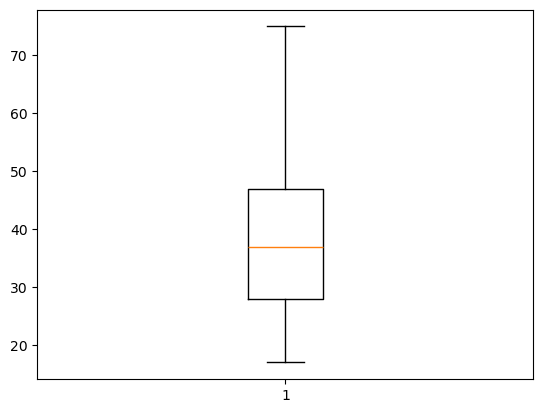

In [8]:
plt.boxplot(df['age'])
plt.show()

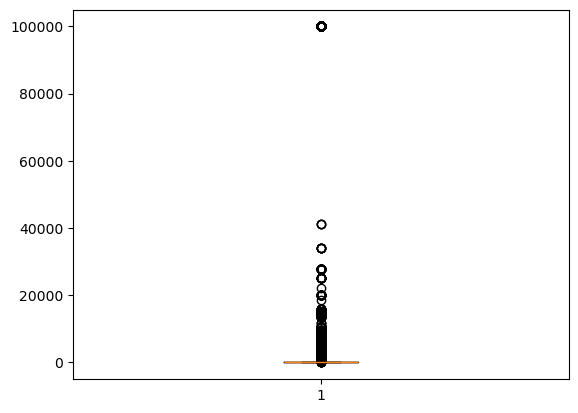

In [9]:
plt.boxplot(df['capital-gain'])
plt.show()

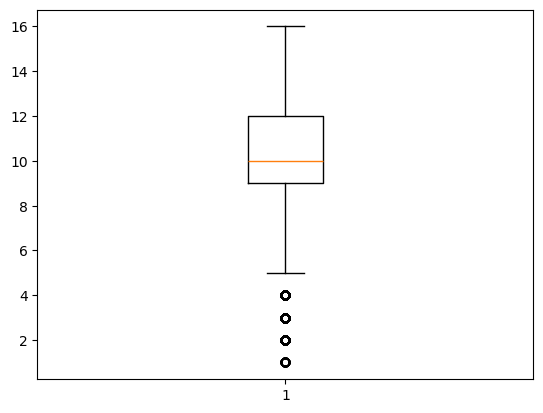

In [10]:
plt.boxplot(df['educational-num'])
plt.show()

In [11]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

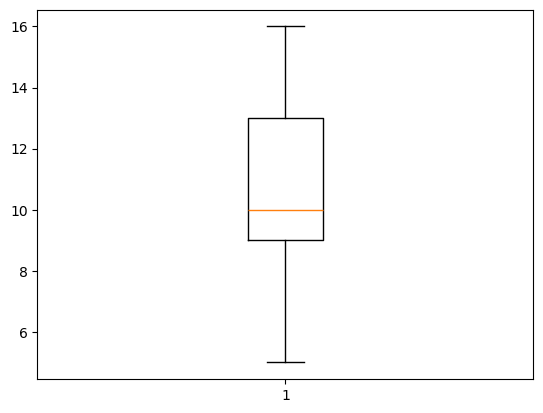

In [13]:
plt.boxplot(df['educational-num'])
plt.show()

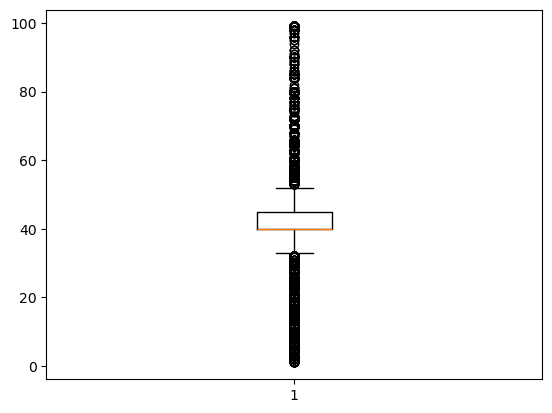

In [14]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [15]:
df=df.drop(columns=['education'])
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [16]:
#label encoding
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['workclass']=l.fit_transform(df['workclass'])
df['marital-status']=l.fit_transform(df['marital-status'])
df['occupation']=l.fit_transform(df['occupation'])
df['relationship']=l.fit_transform(df['relationship'])
df['race']=l.fit_transform(df['race'])
df['gender']=l.fit_transform(df['gender'])
df['native-country']=l.fit_transform(df['native-country'])

In [62]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,4,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,3,103497,10,4,8,3,4,0,0,0,30,39,<=50K


In [17]:
#splitting data
x=df.drop(columns=['income']) 
y=df['income'] 
x.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,10,4,0,3,4,0,0,0,30,39


In [18]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 46748, dtype: object

In [19]:
# training the data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
#fine-tuning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

models={
    "LogisticRegression":LogisticRegression(max_iter=1000),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier(),
    "GradientBoost":GradientBoostingClassifier(),
    "SVM":SVC(),}
results={}

for i,j in models.items():
    j.fit(X_train,y_train)
    y_pred=j.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[i]=accuracy
    print(f"{i}:{accuracy:.4f}")

best_model_name=max(results, key=results.get)
best_model=models[best_model_name]
print(f"\nBest Model:{best_model_name} with accuracy of {results[best_model_name]:.4f}")

joblib.dump(best_model, "bestmodel.pkl")
print("Saved best model as bestmodel.pkl")

LogisticRegression:0.8020
KNN:0.7756
RandomForest:0.8525
GradientBoost:0.8649
SVM:0.7954

Best Model:GradientBoost with accuracy of 0.8649
Saved best model as bestmodel.pkl


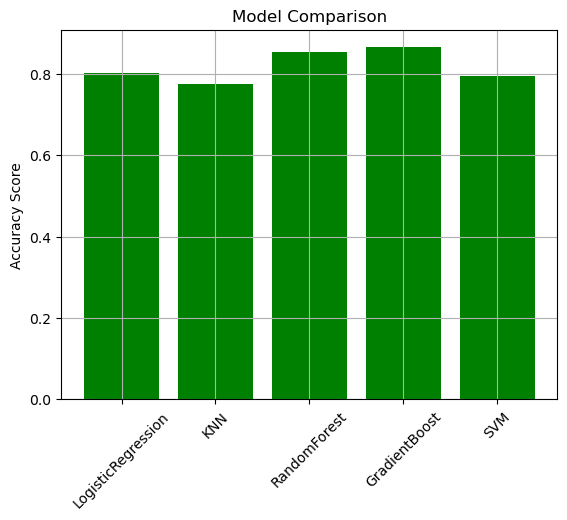

In [28]:
#model camparison analysis
plt.bar(results.keys(), results.values(), color='green')
plt.xticks(rotation=45)
plt.title('Model Comparison')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()